# utils

> Fill in a module description here

In [16]:
#| default_exp utils

In [17]:
#| hide
from nbdev.showdoc import *
%reload_ext autoreload
%autoreload 2

In [18]:
#| export
from typing import List, Tuple
import PIL

In [19]:
PIL.PngImagePlugin.PngImageFile

PIL.PngImagePlugin.PngImageFile

# generate_image_grid

In [20]:
#| export
def generate_image_grid(
    images, 
#     images: List[PIL.PngImagePlugin.PngImageFile], 
    nrow: int, 
    ncol: int):

    w, h = images[0].size # assume all images are of the same size
    grid = Image.new('RGB', size=(ncol * w, nrow * h))
    for i, im in enumerate(images): 
        grid.paste(im, box=(i % ncol * w, i // ncol * h))
    return grid

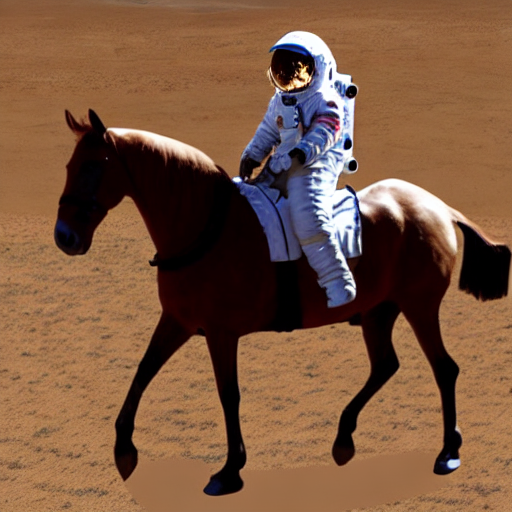

In [21]:
#| server
image = Image.open("astronaut_rides_horse.png")
image

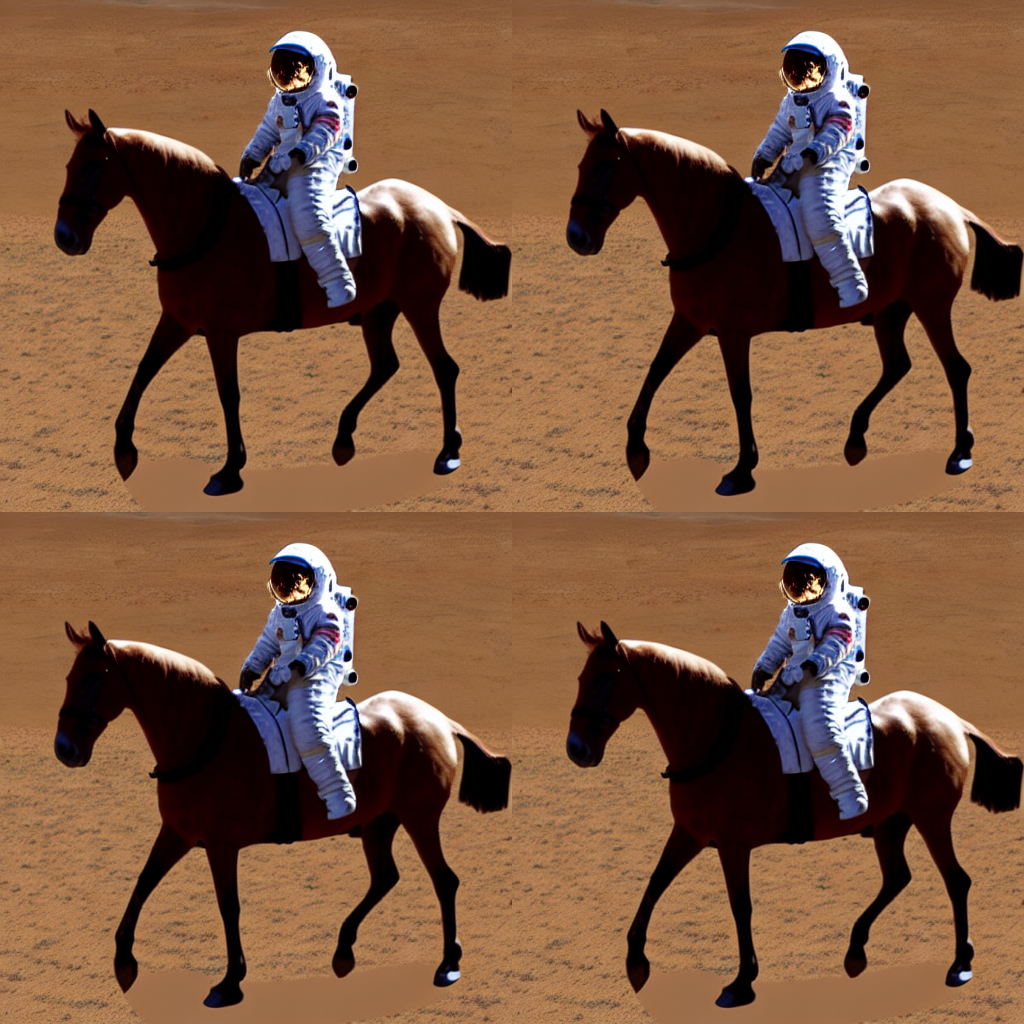

In [10]:
#| server
grid = generate_image_grid([image] * 4, 2, 2)
grid

# get_image_size_from_aspect_ratio

In [12]:
#| export
def get_image_size_from_aspect_ratio(aspect_ratio: float) -> Tuple[int, int]:
    base = 512
    width, height = (base, base)
    
    if aspect_ratio == 1:
        pass
    elif aspect_ratio < 1:
        height = base
        raw_width = round(height * aspect_ratio)
        multiplier = raw_width // 8
        width = 8 * multiplier
    elif aspect_ratio > 1:
        width = base
        raw_height = round(width / aspect_ratio)
        multiplier = raw_height // 8
        height = 8 * multiplier
    
    return (width, height)

In [14]:
#| server
aspect_ratio = 0.6
width, height = get_image_size_from_aspect_ratio(aspect_ratio)
width, height

(304, 512)

In [22]:
#| hide
import nbdev; nbdev.nbdev_export()